
# OTA_HotelDescriptiveContentNotifRQ

Analysis is done on basis of 3 files that were processed at 1st of December 2021.


## Import the relevant libraries

In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re
sns.set()

## Load all parquet files that were available with that message

In [2]:
OTA_HotelDescriptiveContentNotifRQ_Messages = pd.read_parquet("Documents/ota_hotelDescriptiveContent", engine='auto')
OTA_HotelDescriptiveContentNotifRQ_Messages

,HotelDescriptiveContentNotifRQ_Messages
0,[{'MessageMeta': {'X-Correlation-ID': '59682e2...
1,[{'MessageMeta': {'X-Correlation-ID': '0dfa2bf...
2,[{'MessageMeta': {'X-Correlation-ID': '1c70984...


## Create DataFrame from loaded data

### Resolving first level of nesting<hr>

In [3]:
firstLevel = []
for index, level in OTA_HotelDescriptiveContentNotifRQ_Messages.iterrows():
    firstLevel.extend(OTA_HotelDescriptiveContentNotifRQ_Messages.iloc[index,0])

### Resolving all levels of nesting<hr>

In [4]:
import ast
import re

def resolveNestedArray(di, row_data):
    newDi = []
    for row in row_data:
        di.update(row)
        newDi.append(di)
    return newDi

def isDict(vvalue):
    if re.search("\{",str(vvalue)):
        return True
    else:
        return False
    
    
def unnestFile(li, key_level=""):
    listOfUnnested = []
    for level in li:
        row_data = None
        level1 = {}
        for key, value in level.items():
            if isinstance(value, np.ndarray):
                row_data = unnestFile(value, key+"_")
            elif isinstance(value, str)&isDict(value):
                level1[key_level+"_"+ key] = ast.literal_eval(value)   
            elif isinstance(value, dict):
                level1.update(value)
            elif isinstance(value, list):
                for l in value:
                    if isinstance(l, dict):
                       level1.update(l) 
            else:
                level1[key_level+key] = value

        if row_data is not None:
            newDi = resolveNestedArray(level1, row_data)
            listOfUnnested.extend(newDi)
        else:
            listOfUnnested.append(level1)
    return listOfUnnested


def prepareForDF(firstLevel):
    levelTemp = unnestFile(firstLevel)
    while any(isinstance(n, dict) for n in levelTemp[0].values())|any(isinstance(m, np.ndarray) for m in levelTemp[0].values())|any(isinstance(l, list) for l in levelTemp[0].values()):
        newL = unnestFile(levelTemp)
        levelTemp = newL
    return levelTemp              

final = prepareForDF(firstLevel)

### Creating DataFrame<hr>

In [5]:
finalData_raw = pd.DataFrame(final)

In [6]:
finalData_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 79 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   X-Correlation-ID                                473 non-null    object 
 1   Type                                            473 non-null    object 
 2   AppId                                           473 non-null    object 
 3   PrimaryLangID                                   0 non-null      object 
 4   EchoToken                                       0 non-null      object 
 5   TimeStamp                                       0 non-null      object 
 6   Version                                         473 non-null    object 
 7   Target                                          0 non-null      object 
 8   CorrelationID                                   0 non-null      object 
 9   HotelDescriptiveContent_LanguageCode       

In [7]:
finalData_raw

,X-Correlation-ID,Type,AppId,PrimaryLangID,EchoToken,TimeStamp,Version,Target,CorrelationID,HotelDescriptiveContent_LanguageCode,...,TypeRoom_StandardNumBeds,TypeRoom_StandardOccupancy,MultimediaDescription_InfoCode,MultimediaDescription_AdditionalDetailCode,MultimediaDescription_ImageItems,TextItem_Title,TextItem_Description,MultimediaDescription_TextItems,GuestRoom_Amenities,HotelDescriptiveContent_TPA_Extensions
0,59682e21-e514-4bc0-88f0-f86c7d3fc302,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59682e21-e514-4bc0-88f0-f86c7d3fc302,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20e2c010-8ecc-4a48-9bd5-6ca06bd53975,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,25,4,NaN,Room Type Name,Family Room,NaN,NaN,NaN
3,20e2c010-8ecc-4a48-9bd5-6ca06bd53975,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,25,4,NaN,Room Type Name,Family Room,NaN,NaN,NaN
4,09455d74-fbf8-40f5-b84c-01839975801f,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,5dce3835-5819-42f1-bfbd-36db179b971c,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,zh_CN,...,NaN,NaN,1,4,NaN,Room Type description,&amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;a...,NaN,NaN,
469,5dce3835-5819-42f1-bfbd-36db179b971c,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,zh_CN,...,NaN,NaN,1,4,NaN,Room Type description,&amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;a...,NaN,NaN,
470,c9e607fb-767b-42fb-972e-9f915caa8794,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,zh_CN,...,NaN,NaN,1,4,NaN,Room Type description,&amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;a...,NaN,NaN,
471,c9e607fb-767b-42fb-972e-9f915caa8794,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,zh_CN,...,NaN,NaN,1,4,NaN,Room Type description,&amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;a...,NaN,NaN,


#### Creating working set of data

In [8]:
OTA_HotelDescriptiveContentNotifRQ = finalData_raw.copy()

# Data Analysis

### Basic information about data<hr>

In [9]:
OTA_HotelDescriptiveContentNotifRQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 79 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   X-Correlation-ID                                473 non-null    object 
 1   Type                                            473 non-null    object 
 2   AppId                                           473 non-null    object 
 3   PrimaryLangID                                   0 non-null      object 
 4   EchoToken                                       0 non-null      object 
 5   TimeStamp                                       0 non-null      object 
 6   Version                                         473 non-null    object 
 7   Target                                          0 non-null      object 
 8   CorrelationID                                   0 non-null      object 
 9   HotelDescriptiveContent_LanguageCode       

In [10]:
OTA_HotelDescriptiveContentNotifRQ.head(10)

,X-Correlation-ID,Type,AppId,PrimaryLangID,EchoToken,TimeStamp,Version,Target,CorrelationID,HotelDescriptiveContent_LanguageCode,...,TypeRoom_StandardNumBeds,TypeRoom_StandardOccupancy,MultimediaDescription_InfoCode,MultimediaDescription_AdditionalDetailCode,MultimediaDescription_ImageItems,TextItem_Title,TextItem_Description,MultimediaDescription_TextItems,GuestRoom_Amenities,HotelDescriptiveContent_TPA_Extensions
0,59682e21-e514-4bc0-88f0-f86c7d3fc302,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59682e21-e514-4bc0-88f0-f86c7d3fc302,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20e2c010-8ecc-4a48-9bd5-6ca06bd53975,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,25,4,NaN,Room Type Name,Family Room,NaN,NaN,NaN
3,20e2c010-8ecc-4a48-9bd5-6ca06bd53975,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,25,4,NaN,Room Type Name,Family Room,NaN,NaN,NaN
4,09455d74-fbf8-40f5-b84c-01839975801f,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,09455d74-fbf8-40f5-b84c-01839975801f,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4cb4eeb5-7a1f-4d22-88bc-aeec53c8d998,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4cb4eeb5-7a1f-4d22-88bc-aeec53c8d998,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,287304aa-863a-436e-bf15-e9956acdb65e,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,287304aa-863a-436e-bf15-e9956acdb65e,OTA_HotelDescriptiveContentNotifRQ,shiji,None,None,None,0,None,None,en_US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Basic statistic for data<hr>

In [11]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [12]:
OTA_HotelDescriptiveContentNotifRQ.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X-Correlation-ID,473,127,7b26c392-d076-4874-8654-d86eac94513f,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,473,1,OTA_HotelDescriptiveContentNotifRQ,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AppId,473,1,shiji,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrimaryLangID,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EchoToken,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TimeStamp,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Version,473,1,0,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Target,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CorrelationID,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HotelDescriptiveContent_LanguageCode,473,2,zh_CN,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Removing columns with 0 values/null values, that gives nothing to analysis

In [13]:
OTA_HotelDescriptiveContentNotifRQ = OTA_HotelDescriptiveContentNotifRQ.drop(columns=["PrimaryLangID","EchoToken","TimeStamp","Target","CorrelationID", "HotelDescriptiveContent_CurrencyCode", 
                                                                     "HotelDescriptiveContent_ChainName", "HotelStatus","HotelStatusCode", "CategoryCodes", "Languages", 
                                                                      "Services","MeetingRooms","MaxOccupancy","HotelDescriptiveContent_AreaInfo","ContactInfo_ContactProfileID",
                                                                     "ContactInfo_ContactProfileType","ContactInfo_Location","ContactInfo_Emails","ContactInfo_Names","ContactInfo_URLs",
                                                                     "Phone_Extension","Phone_AreaCityCode","Phone_CountryAccessCode","Phone_PIN","Descriptions","Position","HotelDescriptiveContent_Policies",
                                                                     "HotelDescriptiveContent_MultimediaDescriptions","HotelDescriptiveContent_AffiliationInfo","HotelDescriptiveContent_ContactInfos",
                                                                     "GuestRoom_Language","GuestRoom_MaxAdultOccupancy","GuestRoom_MaxChildOccupancy","GuestRoom_MinOccupancy","GuestRoom_NonsmokingQuantity",
                                                                     "GuestRoom_Quality","TypeRoom_RoomCategory","TypeRoom_Quantity","TypeRoom_NonSmoking","TypeRoom_Count","TypeRoom_Name","TypeRoom_StandardNumBeds",
                                                                     "TypeRoom_StandardOccupancy","MultimediaDescription_ImageItems","MultimediaDescription_TextItems","GuestRoom_Amenities","GuestRoom","GuestRoom_Quantity"])

In [14]:
OTA_HotelDescriptiveContentNotifRQ.describe(include="all").transpose()

,count,unique,top,freq
X-Correlation-ID,473,127,7b26c392-d076-4874-8654-d86eac94513f,6
Type,473,1,OTA_HotelDescriptiveContentNotifRQ,473
AppId,473,1,shiji,473
Version,473,1,0,473
HotelDescriptiveContent_LanguageCode,473,2,zh_CN,237
HotelDescriptiveContent_ChainCode,473,3,GRT,236
HotelDescriptiveContent_HotelName,473,3,深圳伊敦雅诗阁服务公寓,237
HotelDescriptiveContent_HotelCode,473,4,GRT003014,146
HotelShortName,473,3,,457
Latitude,16,2,31.18856819955293,10


#### Checking null values for HotelDescriptiveContent_HotelCode

In [15]:
OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode.isna().sum()

0

#### Checking unique values for HotelDescriptiveContent_HotelCode

In [16]:
OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode.unique()

array(['GRT003014', 'GRT130002', 'AS251221', '51221'], dtype=object)

#### Checking null values for HotelDescriptiveContent_HotelName

In [22]:
OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelName.isna().sum()

0

#### Changing names of one hotel/roomTypes to english version

In [58]:
OTA_HotelDescriptiveContentNotifRQ['HotelDescriptiveContent_HotelName'] = OTA_HotelDescriptiveContentNotifRQ['HotelDescriptiveContent_HotelName'].replace(['深圳伊敦雅诗阁服务公寓'],'Shenzhen Eden Ascott Service Apartment')

In [59]:
OTA_HotelDescriptiveContentNotifRQ['GuestRoom_RoomTypeName'] = OTA_HotelDescriptiveContentNotifRQ['GuestRoom_RoomTypeName'].replace(['两房豪华行政套房'],'Two Bedroom Deluxe Executive Suite')
OTA_HotelDescriptiveContentNotifRQ['GuestRoom_RoomTypeName'] = OTA_HotelDescriptiveContentNotifRQ['GuestRoom_RoomTypeName'].replace(['行政单房公寓'],'Executive Studio')

In [60]:
OTA_HotelDescriptiveContentNotifRQ['GuestRoom_RoomTypeName'].unique()

array([nan, 'Family Room', 'Deluxe Suite Room', 'Suite Room',
       'Premier Room', 'Business King Room', 'Business Twin Room',
       'Premier Twin Room', 'Housing heart prevention and control room',
       'Twin Room', 'Studio Premier', 'Two-Bedroom Executive',
       'Two-bedroom Penthouse', 'One-Bedroom Premier',
       'Two Bedroom Deluxe Executive Suite', 'Executive Studio',
       'One-Bedroom Executive', 'Two-Bedroom Deluxe'], dtype=object)

#### Checking unique values for HotelDescriptiveContent_HotelName

In [61]:
OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelName.unique()

array(['GreenTree Eastern Shanghai Hongqiao Airport Zoo Subway Station Hotel',
       'GreenTree Inn Shanghai Hongqiao Airport Apartment Hotel',
       'Shenzhen Eden Ascott Service Apartment'], dtype=object)

#### Checking null values for HotelDescriptiveContent_ChainCode

In [62]:
OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode.isna().sum()

0

#### Checking unique values for HotelDescriptiveContent_ChainCode

In [63]:
OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode.unique()

array(['GRT', 'AS2', 'CCM'], dtype=object)

#### HotelDescriptiveContent_HotelName by HotelDescriptiveContent_HotelCode

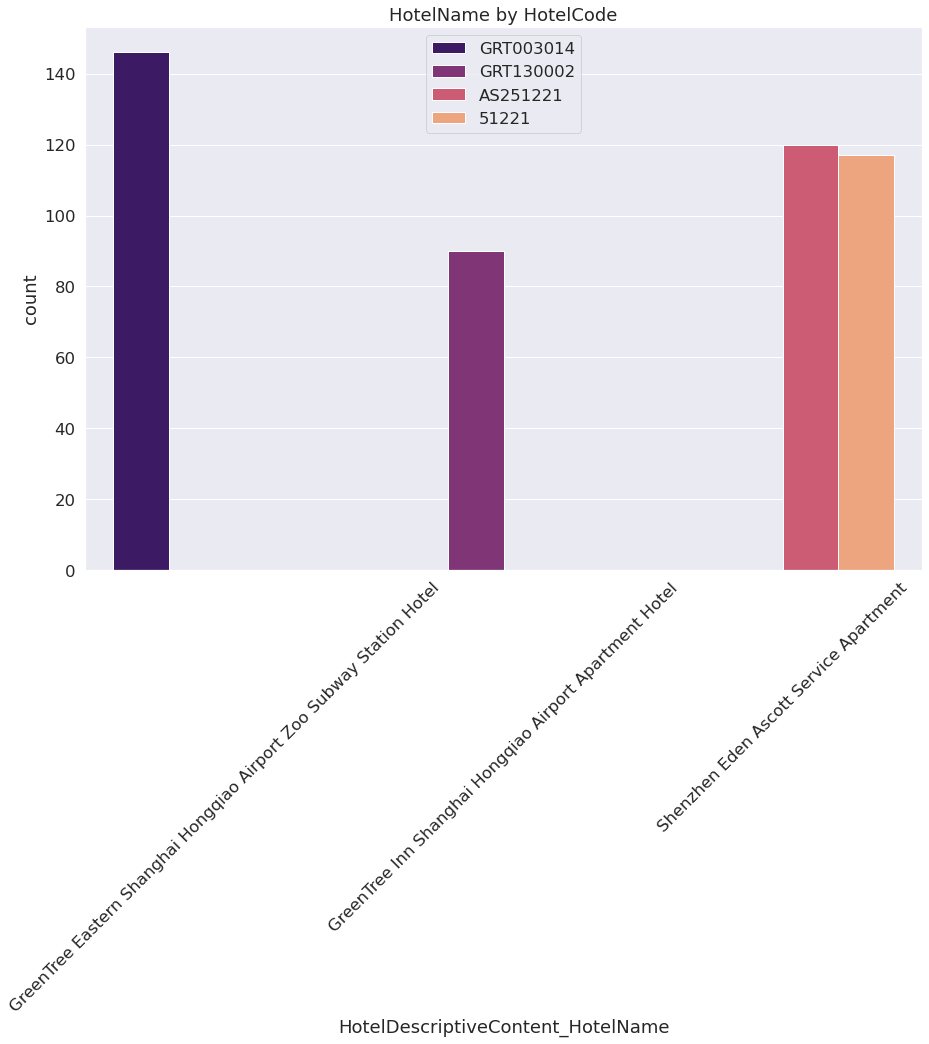

In [64]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(15,10)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelName, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = 'magma')
plt.rc('font',  **{'sans-serif' : 'Arial',
                         'family' : 'sans-serif'})
plt.legend(loc="upper center")
plt.xticks(rotation=45)
plt.title('HotelName by HotelCode')
plt.show()

#### HotelDescriptiveContent_HotelCode by HotelDescriptiveContent_ChainCode

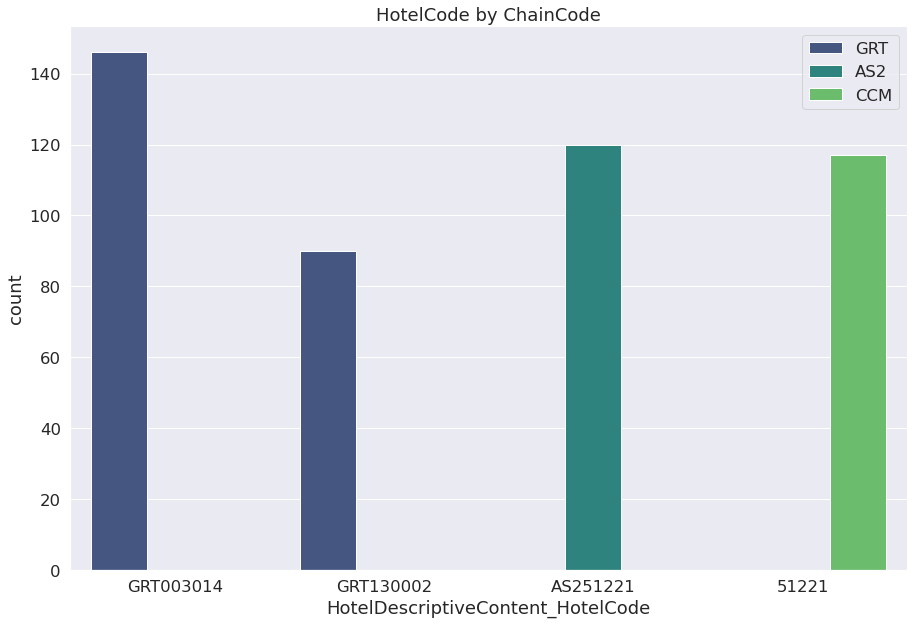

In [65]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(15,10)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "viridis")
plt.legend(loc="upper right")
plt.title('HotelCode by ChainCode')
plt.show()

#### HotelDescriptiveContent_LanguageCode by HotelCode and ChainCode

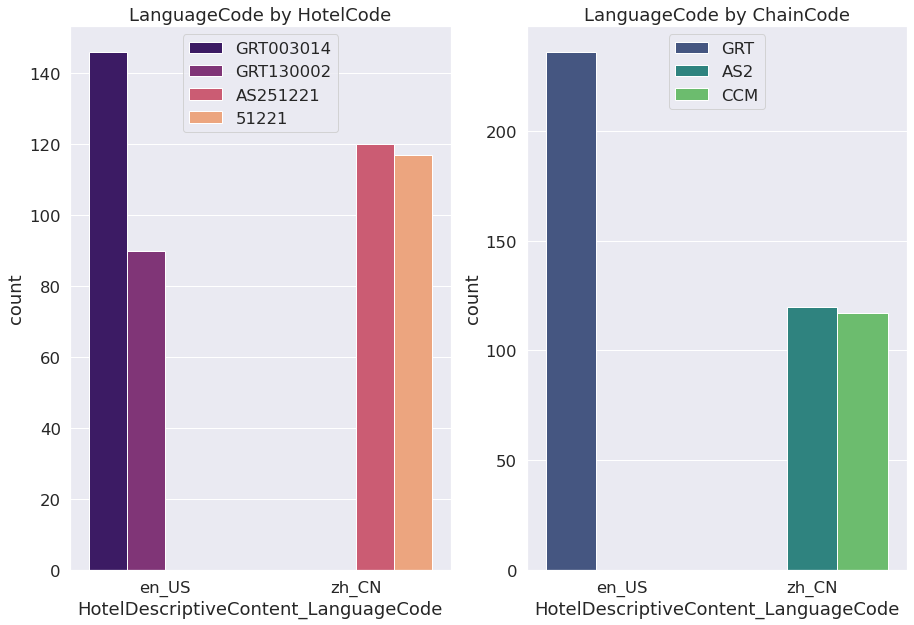

In [66]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(35,10)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_LanguageCode, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "magma", ax=ax[0])
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_LanguageCode, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "viridis", ax=ax[1])
ax[0].legend(loc="upper center")
ax[1].legend(loc="upper center")
ax[0].set_title('LanguageCode by HotelCode')
ax[1].set_title('LanguageCode by ChainCode')
plt.show()

#### Checking against null values for HotelShortName

In [67]:
OTA_HotelDescriptiveContentNotifRQ.HotelShortName.isna().sum()

0

#### HotelShortName by HotelCode and by ChainCode

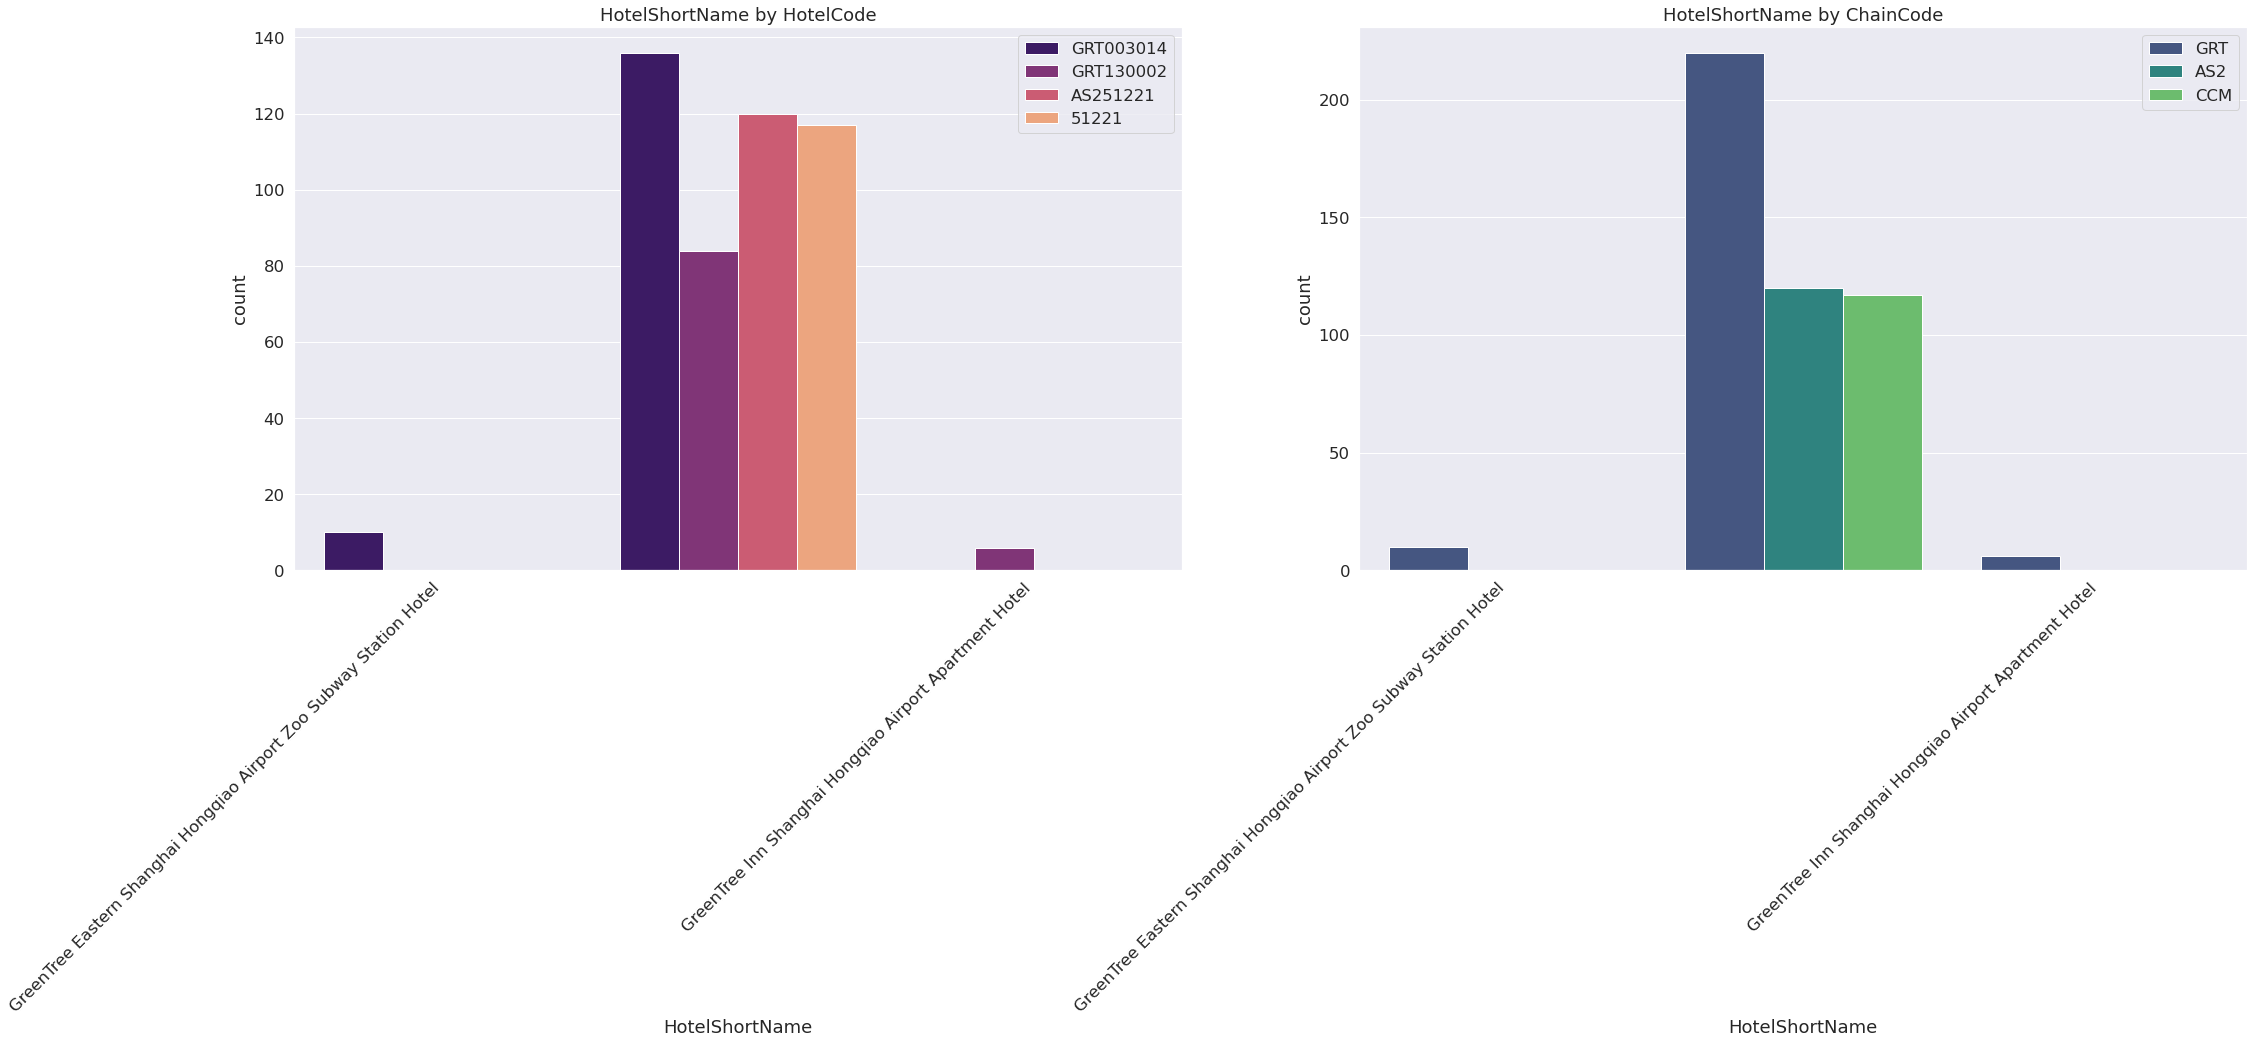

In [68]:
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(35,10)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.HotelShortName, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "magma", ax=ax[0])
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.HotelShortName, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "viridis",ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[0].set_title('HotelShortName by HotelCode')
ax[1].set_title('HotelShortName by ChainCode')
plt.show()

#### Checking against null values for Category

In [69]:
OTA_HotelDescriptiveContentNotifRQ.Category.isna().sum()

237

#### Category by HotelCode and by ChainCode

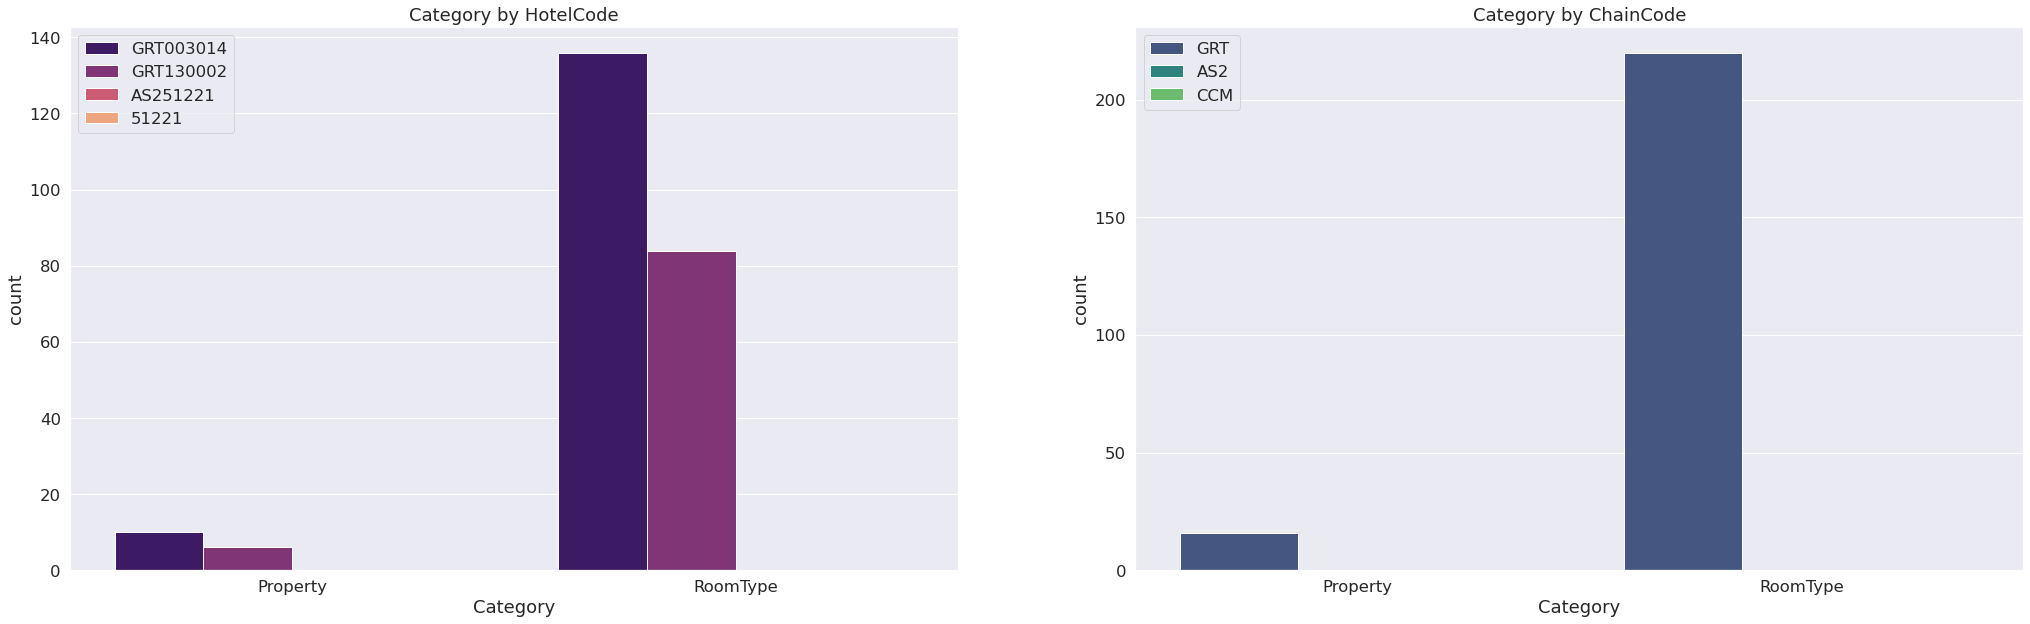

In [70]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(25,10)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.Category, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "magma", ax=ax[0])
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.Category, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "viridis",ax=ax[1])
ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
ax[0].set_title('Category by HotelCode')
ax[1].set_title('Category by ChainCode')
plt.show()


#### Checking against null values for Code

In [71]:
OTA_HotelDescriptiveContentNotifRQ.Code.isna().sum()

237

#### Code by HotelCode

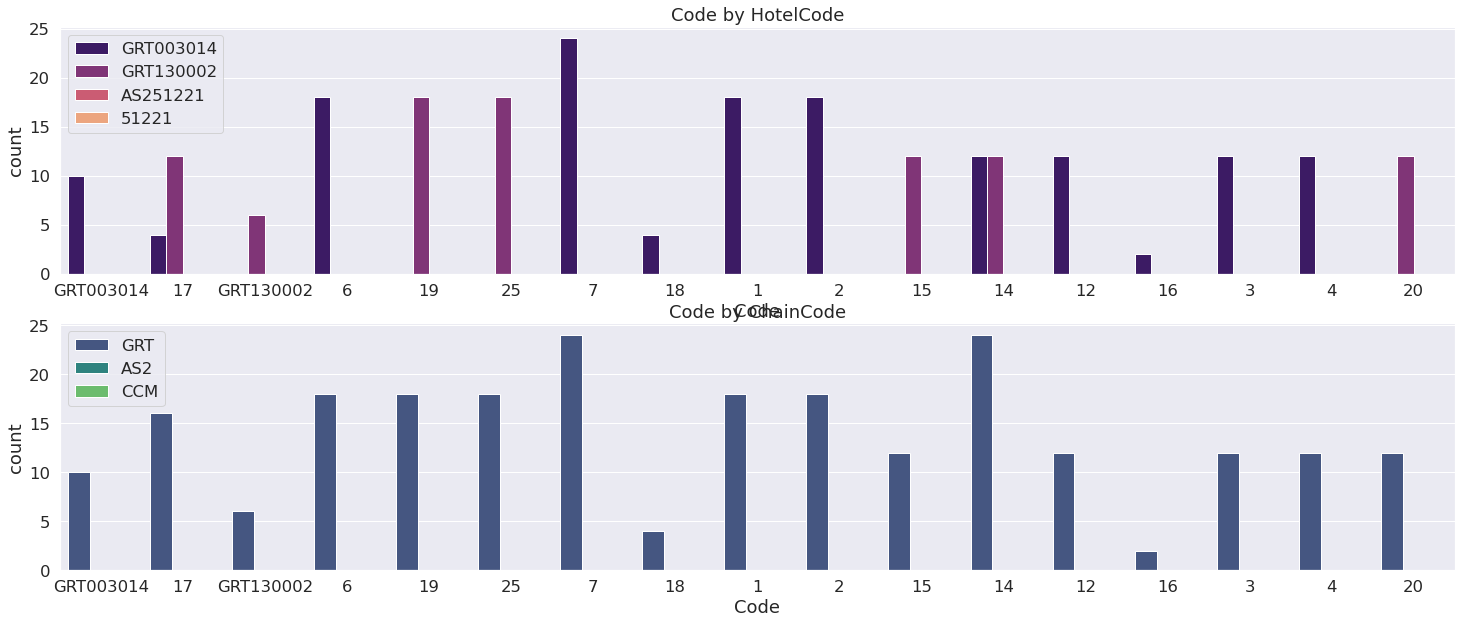

In [72]:
fig, ax =plt.subplots(nrows=2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(25,20)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.Code, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "magma",ax=ax[0])
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.Code, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "viridis",ax=ax[1])
ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
ax[0].set_title('Code by HotelCode')
ax[1].set_title('Code by ChainCode')
plt.show()

#### Checking against null values for Name

In [75]:
OTA_HotelDescriptiveContentNotifRQ.Name.isna().sum()

237

#### Name by HotelCode and ChainCode

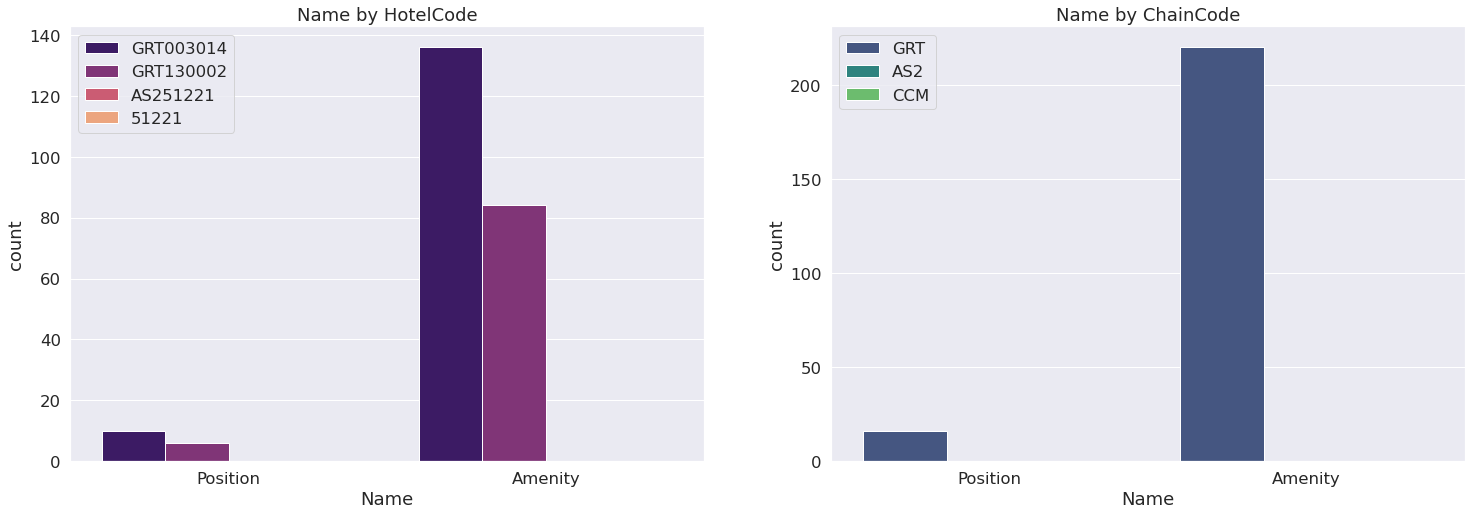

In [76]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(25,8)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.Name, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "magma", ax=ax[0])
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.Name, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "viridis",ax=ax[1])
ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
ax[0].set_title('Name by HotelCode')
ax[1].set_title('Name by ChainCode')
plt.show()

#### Checking against null values for Key

In [77]:
OTA_HotelDescriptiveContentNotifRQ.Key.isna().sum()

237

#### Key by HotelCode

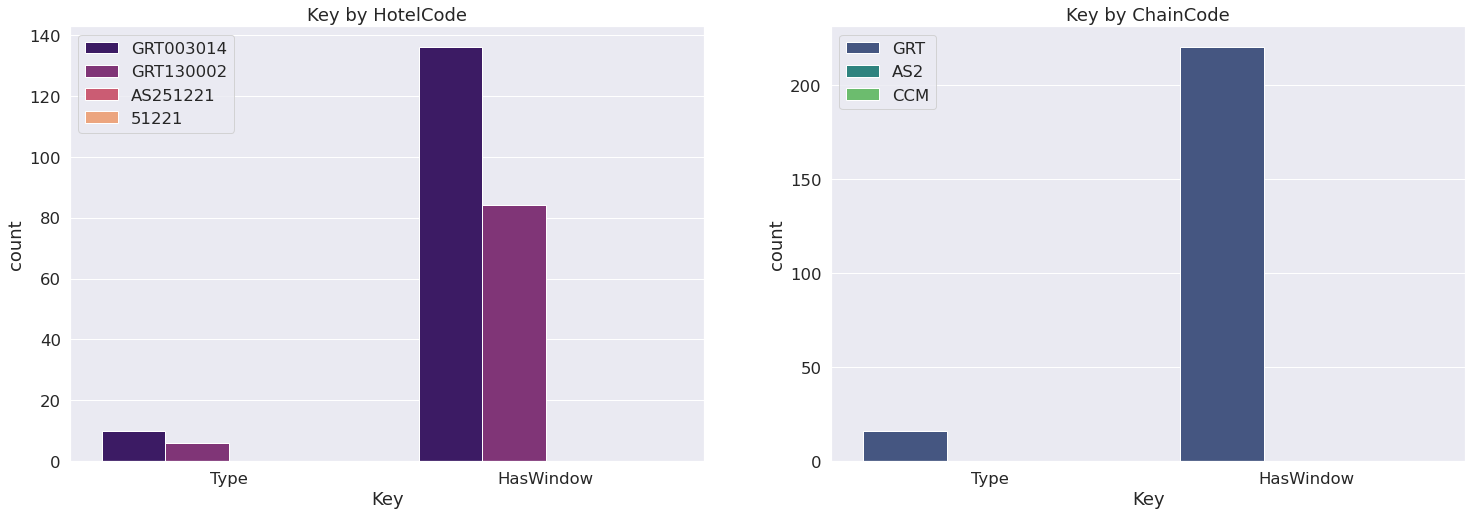

In [78]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(25,10)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.Key, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "magma", ax=ax[0])
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.Key, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "viridis",ax=ax[1])
ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
ax[0].set_title('Key by HotelCode')
ax[1].set_title('Key by ChainCode')
plt.show()

#### Checking against null values for GuestRoom_MaxOccupancy

In [79]:
OTA_HotelDescriptiveContentNotifRQ.GuestRoom_MaxOccupancy.isna().sum()

16

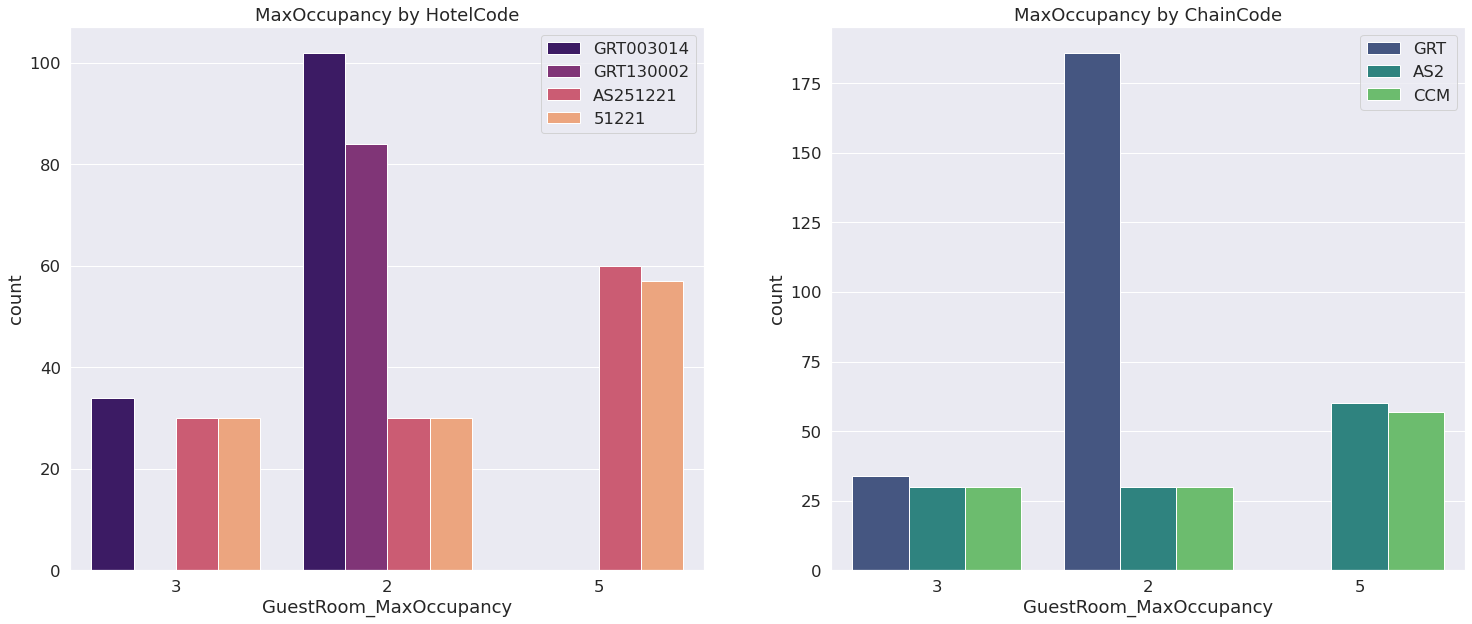

In [80]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(25,10)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.GuestRoom_MaxOccupancy, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "magma", ax=ax[0])
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.GuestRoom_MaxOccupancy, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "viridis",ax=ax[1])
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[0].set_title('MaxOccupancy by HotelCode')
ax[1].set_title('MaxOccupancy by ChainCode')
plt.show()

#### Checking against null values for GuestRoom_RoomTypeName

In [81]:
OTA_HotelDescriptiveContentNotifRQ.GuestRoom_RoomTypeName.isna().sum()

16

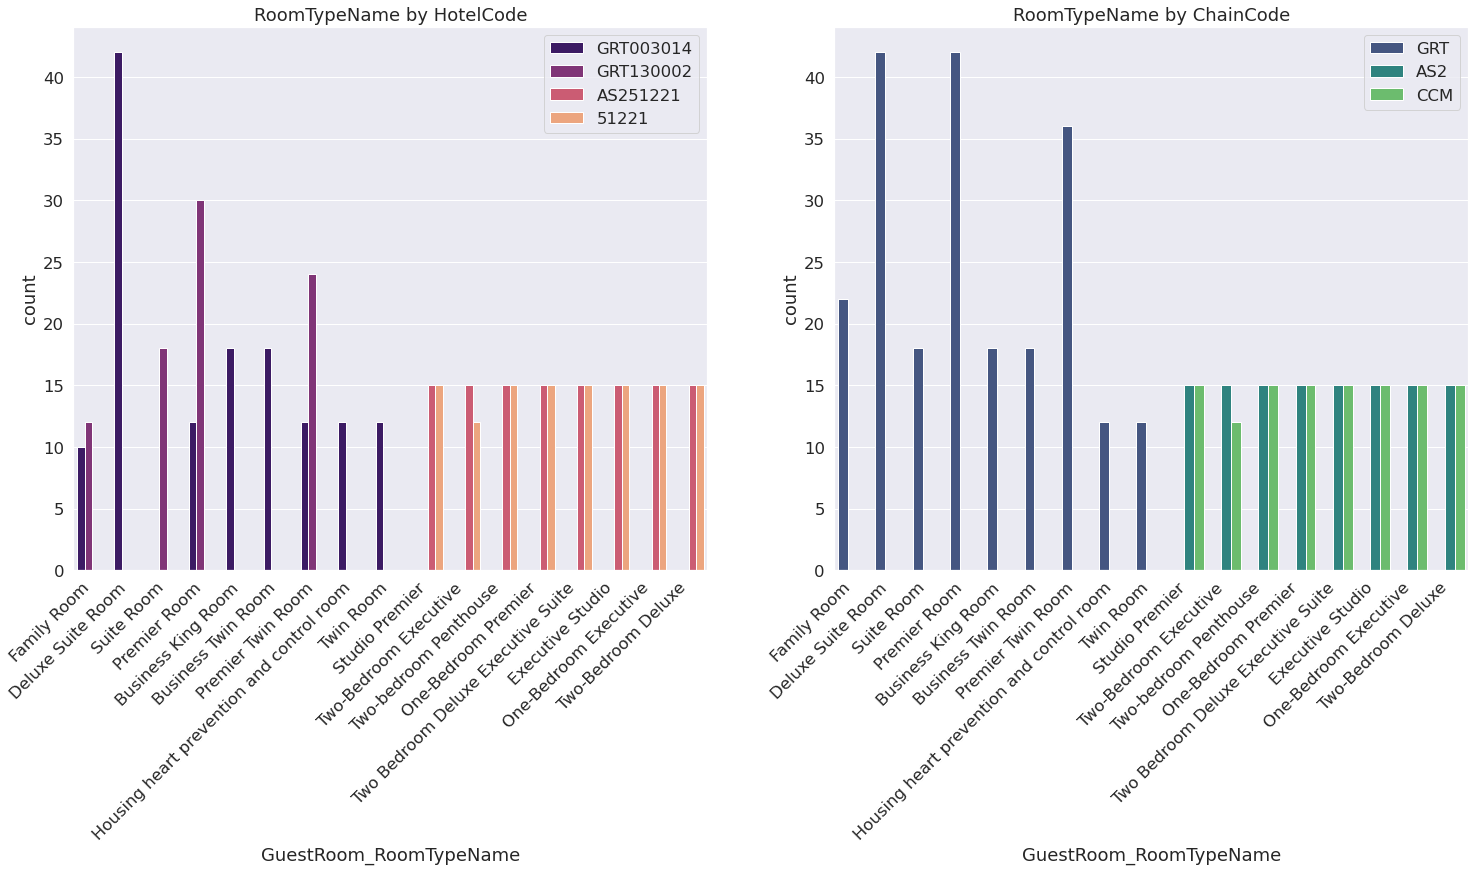

In [82]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(35,25)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.GuestRoom_RoomTypeName, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "magma", ax=ax[0])
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.GuestRoom_RoomTypeName, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "viridis",ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[0].set_title('RoomTypeName by HotelCode')
ax[1].set_title('RoomTypeName by ChainCode')
plt.show()

#### Checking against null values for GuestRoom_Code

In [83]:
OTA_HotelDescriptiveContentNotifRQ.GuestRoom_Code.isna().sum()

16

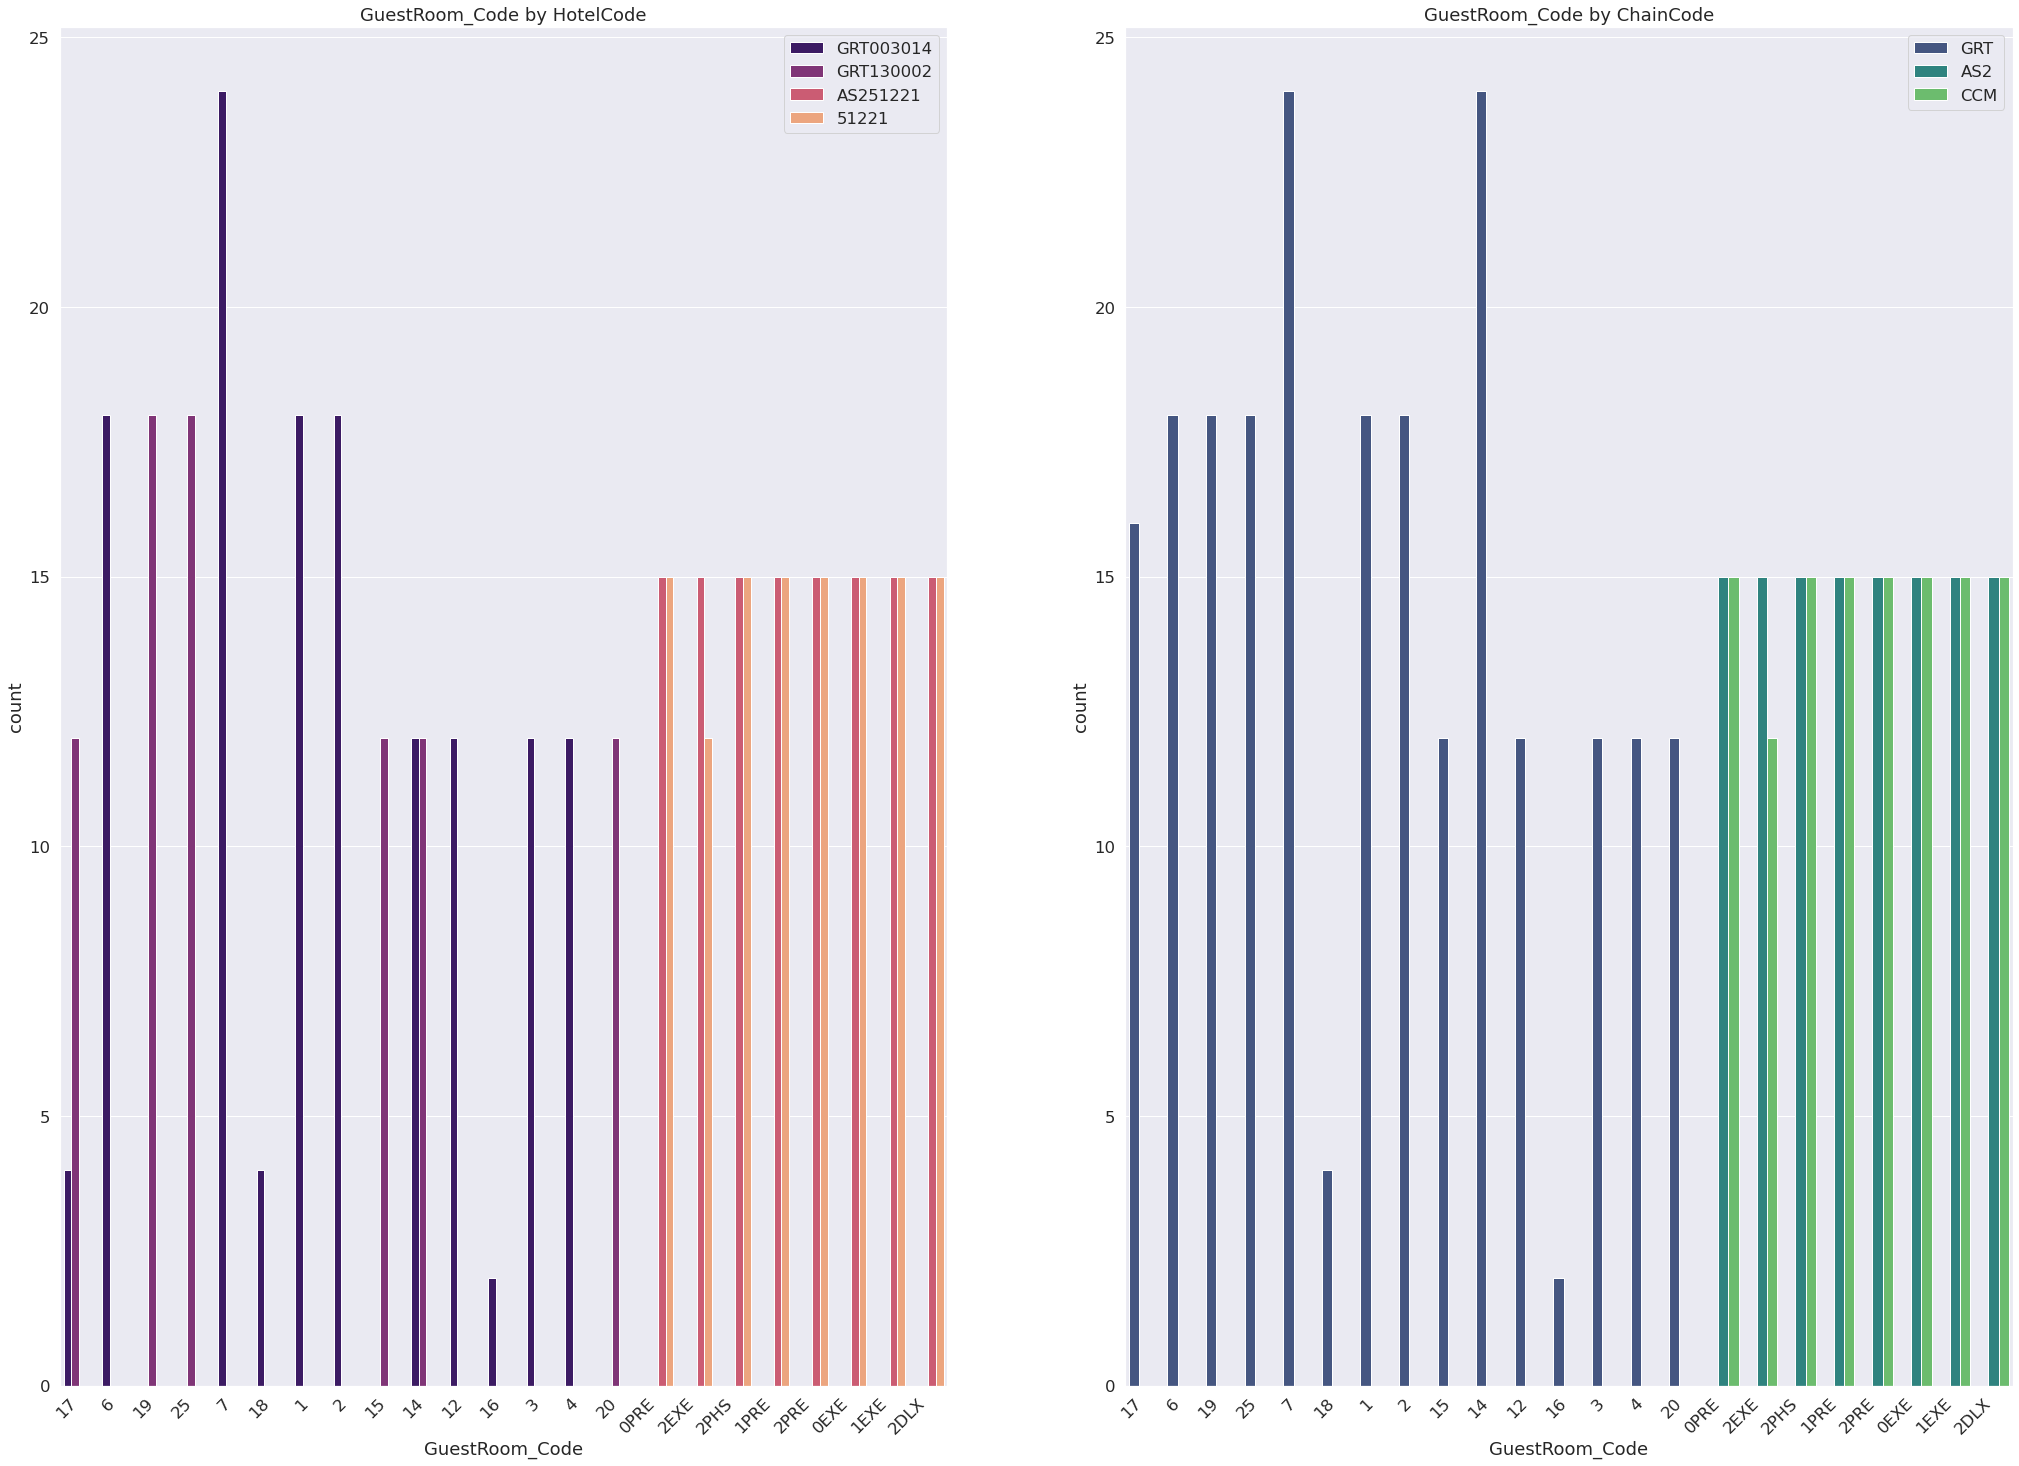

In [84]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(35,10)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.GuestRoom_Code, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "magma", ax=ax[0])
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.GuestRoom_Code, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "viridis",ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[0].set_title('GuestRoom_Code by HotelCode')
ax[1].set_title('GuestRoom_Code by ChainCode')
plt.show()

#### Checking against null values for GuestRoom_DescriptiveText

In [85]:
OTA_HotelDescriptiveContentNotifRQ.GuestRoom_DescriptiveText.isna().sum()

236

In [86]:
OTA_HotelDescriptiveContentNotifRQ.groupby("GuestRoom_DescriptiveText")["X-Correlation-ID"].count()

GuestRoom_DescriptiveText
\n\n1 Bed Area\n\n\n1 Bathroom\n\n\n1 Living and Dining Area\n\n\n1 Balcony\n\n\nApartment Size: 63 sqm\n\n\n1 king-size bed\n\n\nMax 2 person(s)\n\n                                                      30
\n\n1 Bedroom\n\n\n1 Bathroom\n\n\n1 Living and Dining Area\n\n\n1 Balcony\n\n\n1 Kitchenette\n\n\nApartment Size: 75 sqm\n\n\n1 king-size bed\n\n\nMax 3 person(s)\n\n                                    30
\n\n1 Bedroom\n\n\n1 Bathroom\n\n\n1 Living and Dining Area\n\n\n1 Balcony\n\n\n1 Kitchenette\n\n\nApartment Size: 78qm/839sqft\n\n\n1 king-size bed\n\n\nMax 3 person(s)\n\n                              30
\n\n1 个卧室\n\n\n1 个浴室\n\n\n1 个起居和就餐区\n\n\n1 个阳台\n\n\n公寓面积: 59 平方米\n\n\n1 张特大床或 2 张超大单人床\n\n\n最多 2 人\n\n                                                                                                     30
\n\n2 Bedrooms\n\n\n2 Bathrooms\n\n\n1 Living &amp; Dining Area\n\n\n1 Balcony\n\n\n1 Kitchenette\n\n\nApartment Size: 134 - 151 sqm\n\n\n1 king-size 

#### Checking against null values for TypeRoom_BedTypeCode

In [87]:
OTA_HotelDescriptiveContentNotifRQ.TypeRoom_BedTypeCode.isna().sum()

16

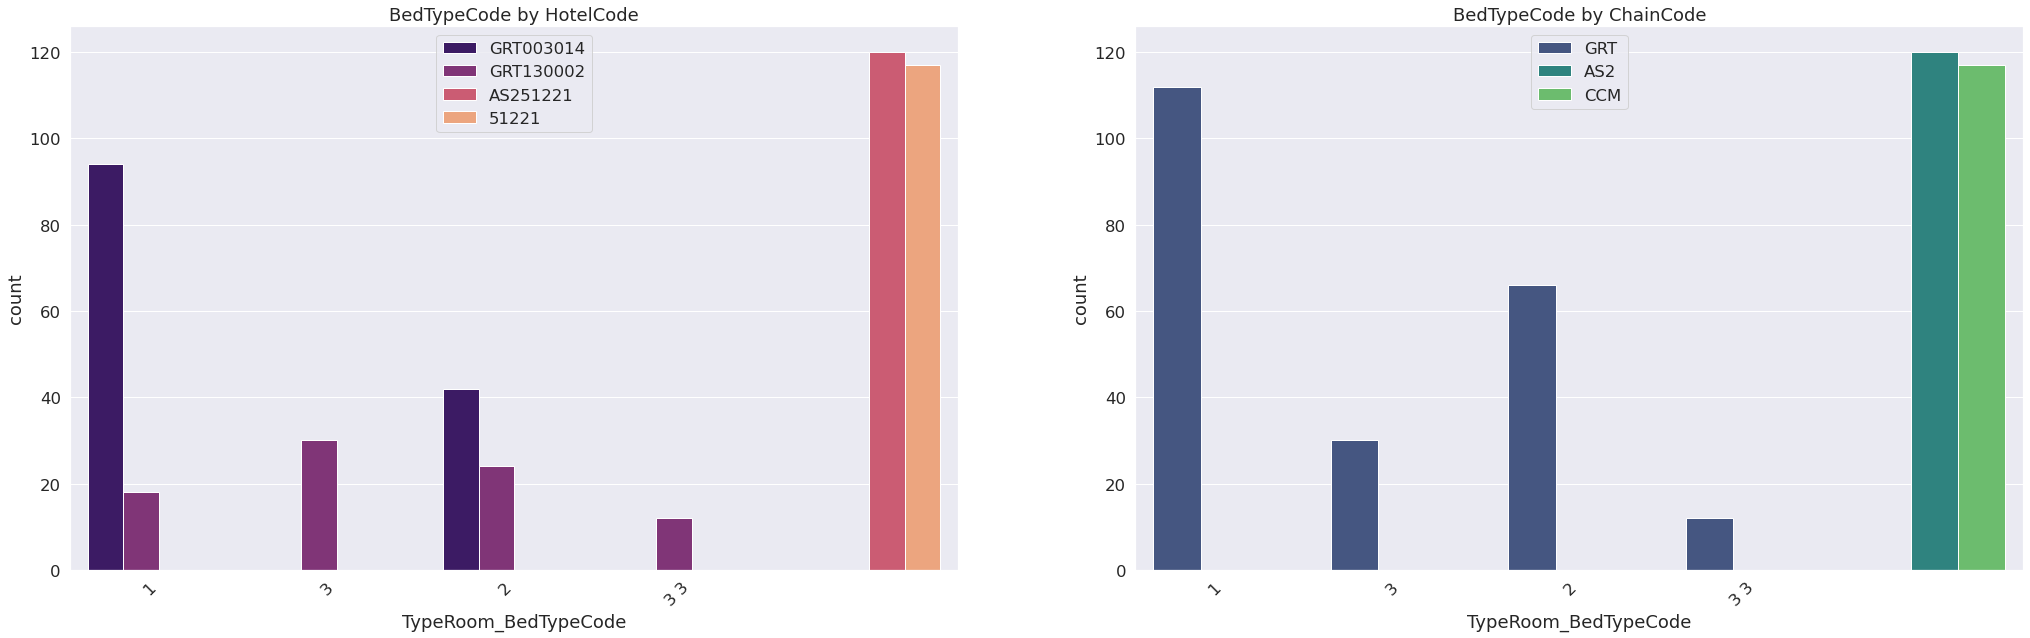

In [88]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(35,15)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.TypeRoom_BedTypeCode, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "magma", ax=ax[0])
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.TypeRoom_BedTypeCode, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "viridis",ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")
ax[0].legend(loc="upper center")
ax[1].legend(loc="upper center")
ax[0].set_title('BedTypeCode by HotelCode')
ax[1].set_title('BedTypeCode by ChainCode')
plt.show()

#### Checking against null values for TypeRoom_Size

In [89]:
OTA_HotelDescriptiveContentNotifRQ.TypeRoom_Size.isna().sum()

236

/home/agata/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/agata/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/agata/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


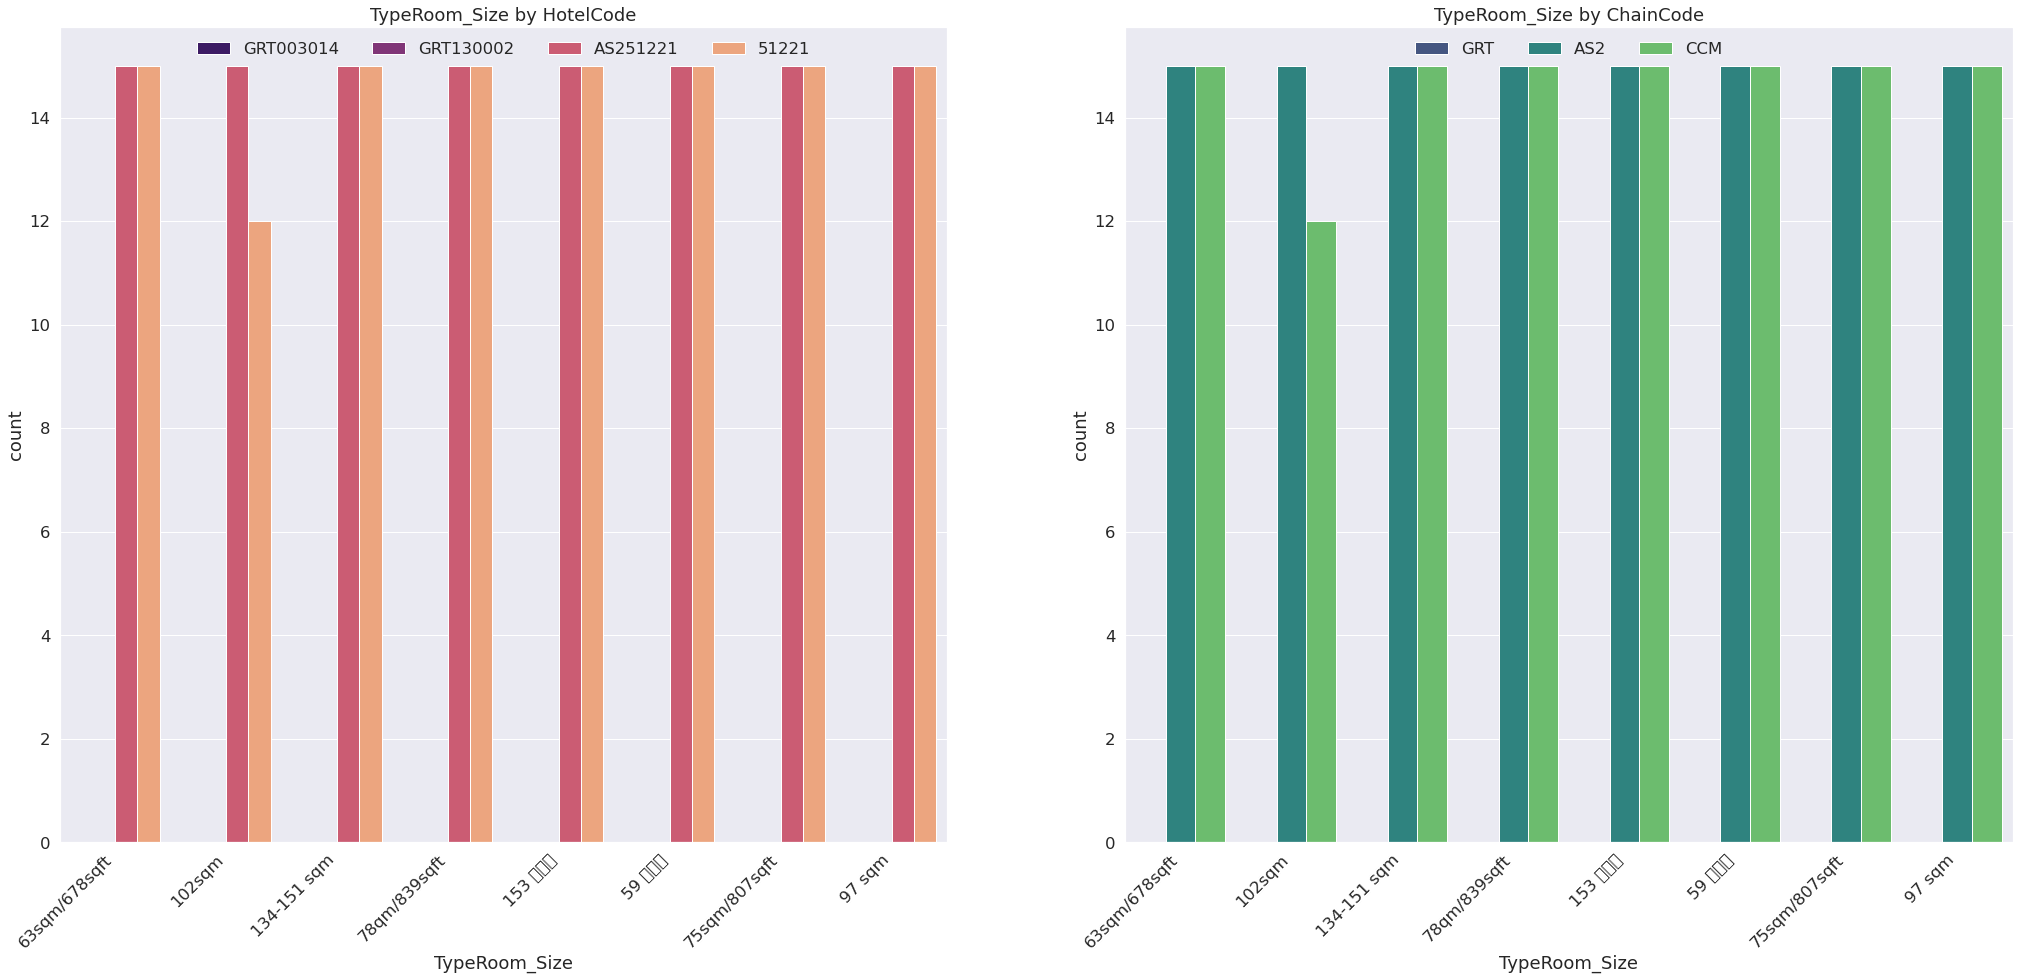

In [90]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(35,15)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.TypeRoom_Size, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "magma", ax=ax[0])
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.TypeRoom_Size, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "viridis",ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")
ax[0].legend(frameon=False,loc="upper center",ncol=4)
ax[1].legend(frameon=False,loc="upper center",ncol=3)
ax[0].set_title('TypeRoom_Size by HotelCode')
ax[1].set_title('TypeRoom_Size by ChainCode')
plt.show()

#### Checking against null values for MultimediaDescription_InfoCode

In [91]:
OTA_HotelDescriptiveContentNotifRQ.MultimediaDescription_InfoCode.isna().sum()

16

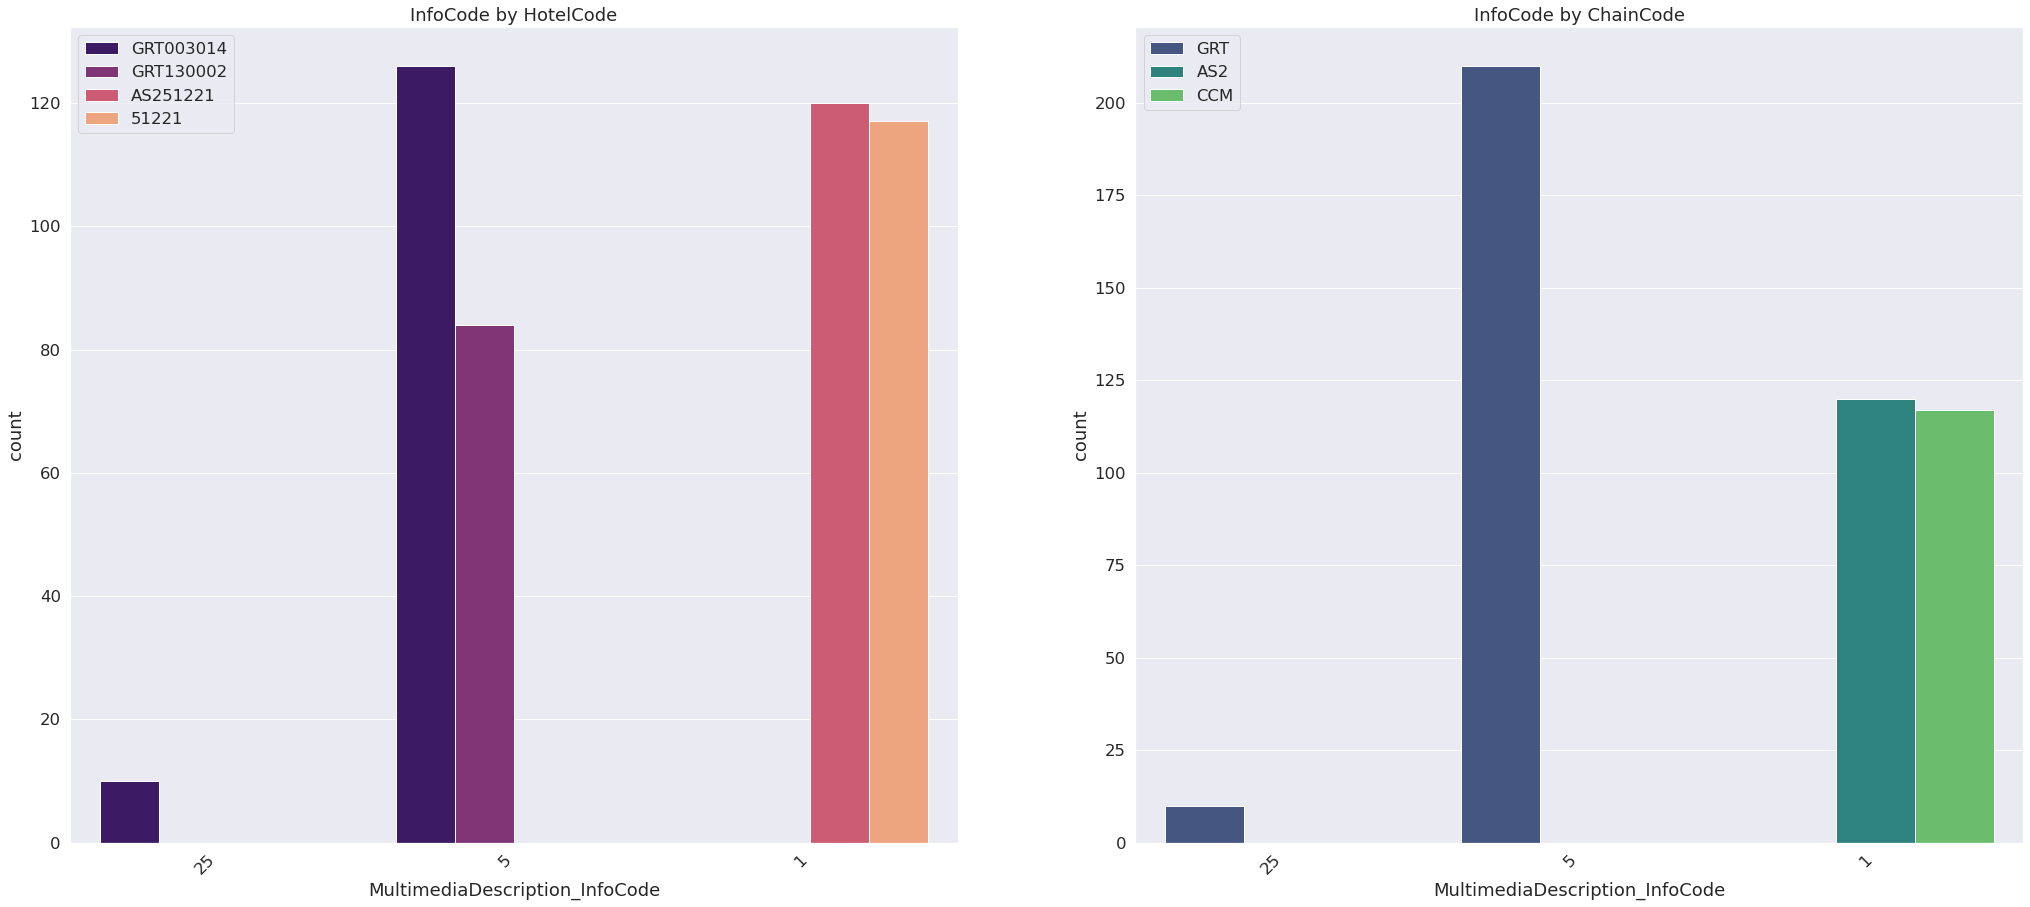

In [92]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(25,10)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.MultimediaDescription_InfoCode, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "magma", ax=ax[0])
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.MultimediaDescription_InfoCode, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "viridis",ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")
ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
ax[0].set_title('InfoCode by HotelCode')
ax[1].set_title('InfoCode by ChainCode')
plt.show()

#### Checking against null values for TextItem_Title

In [93]:
OTA_HotelDescriptiveContentNotifRQ.TextItem_Title.isna().sum()

16

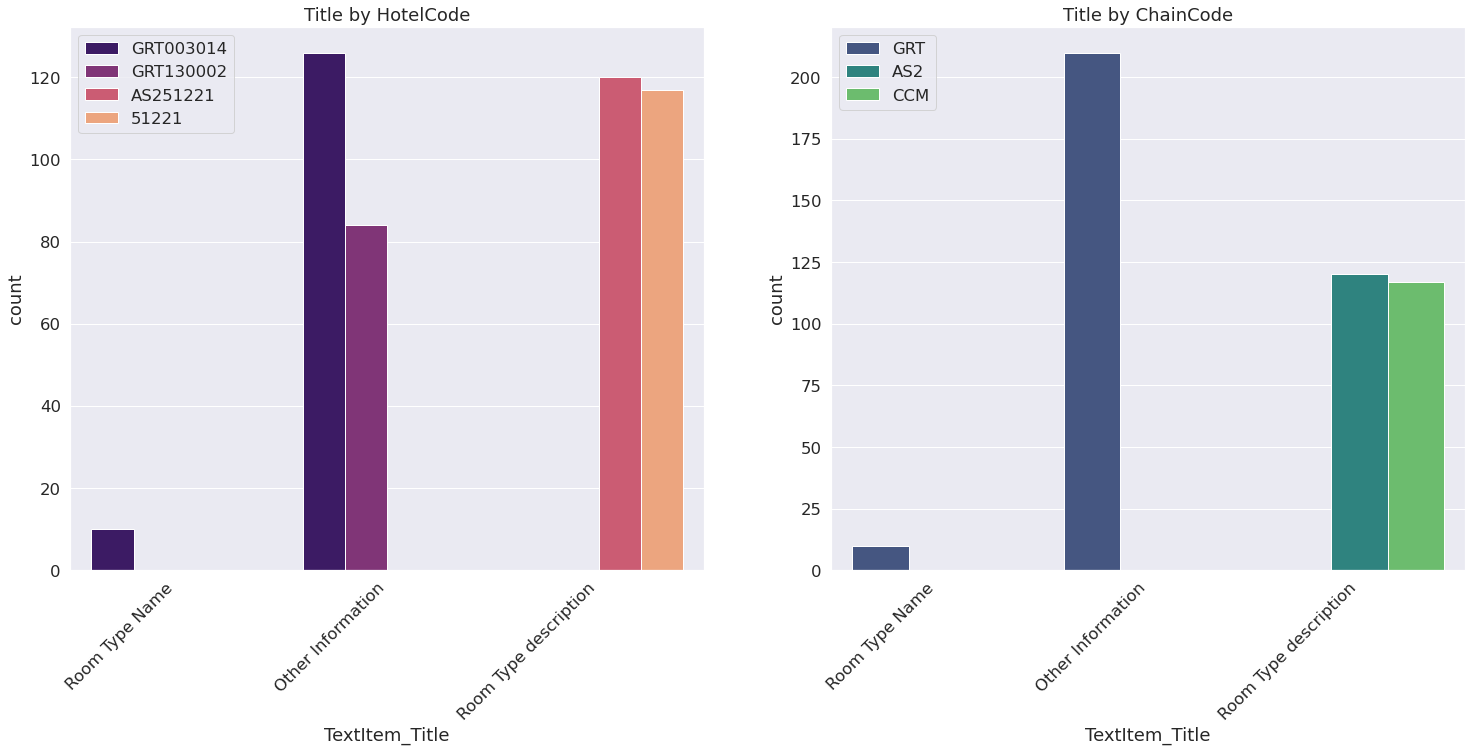

In [94]:
fig, ax =plt.subplots(1,2)
sns.set(font_scale = 1.5, rc={"figure.figsize":(25,10)})
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.TextItem_Title, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_HotelCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "magma", ax=ax[0])
sns.countplot(x = OTA_HotelDescriptiveContentNotifRQ.TextItem_Title, hue = OTA_HotelDescriptiveContentNotifRQ.HotelDescriptiveContent_ChainCode, data = OTA_HotelDescriptiveContentNotifRQ, palette = "viridis",ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")
ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
ax[0].set_title('Title by HotelCode')
ax[1].set_title('Title by ChainCode')
plt.show()